In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

%matplotlib notebook

In [12]:
epd_sequence_data = pd.read_csv('epd_sequence_data.csv', index_col=None)

In [14]:
epd_sequence_data

,Chrom,ChromStart,ChromEnd,Name,Score,Strand,ThickStart,ThickEnd,Sequence,ThickSequence
0,chr1,960583,960643,KLHL17_1,900,+,960632,960643,GGGAGTGAGCGACACAGAGCGGGCCGCCACCGCCGAGCAGCCCTCC...,AGTCTCCGCGT
1,chr1,966432,966492,PLEKHN1_1,900,+,966481,966492,TGCCGGGCGGGACGTCCCGGAGCCCCGCCTGCCCGCGGGAGGCGGG...,AGGAGGCTGTG
2,chr1,976670,976730,PERM1_1,900,-,976670,976681,CGGTTCCCGGGGTTGGTGGGGGTGGGGGCAGGCGGTTCCCGGGGCG...,GTGTGCGGGGC
3,chr1,1000086,1000146,HES4_1,900,-,1000086,1000097,ACACCCCGCGGCGGCGAGGCCTTAAATAGGGAAACGGCCTGAGGCG...,GCGGGCCTGGA
4,chr1,1000461,1000521,ISG15_2,900,+,1000510,1000521,acggagctggggctgtggccgCGCGGGAAGTCGGGAAGGAAATTCC...,AGTGGCGCAGG
5,chr1,1013447,1013507,ISG15_1,900,+,1013496,1013507,ACGTGTGTGCCTCAGGCTTATAATAGGGCCGGTGCTGCCTGCCGAA...,GGCGGCTGAGA
6,chr1,1020070,1020130,AGRN_1,900,+,1020119,1020130,cccgcccgcccgcgctccgccgcctccggagctgcgtcccgtcctg...,agtcccgtccc
7,chr1,1173848,1173908,TTLL10_1,900,+,1173897,1173908,GGGGTTGCCAGGAGACGGTTGCCAGGTCACCACTGTTGTTTCCTGG...,AGGCTCCCAGG
8,chr1,1179638,1179698,TTLL10_2,900,+,1179687,1179698,GTGACCCCTGCCCTCCAGGGACCATCCCTGCGTCACGTCTGCAccc...,accggcctcac
9,chr1,1205579,1205639,TNFRSF18_3,900,-,1205579,1205590,CAGACTCCCAGCCAGGAGCCCTCTGCTCCCTGGAGCCAACTGTGGG...,AGAACGGACAA


In [44]:
nuc_map = {'A': 0, 'T': 1, 'G': 2, 'C': 3,
           'a': 0, 't': 1, 'g': 2, 'c': 3,
           'N': 4}
base_range = np.arange(-49, 11)

In [32]:
freq = np.zeros((60, 5))
for _, row in epd_sequence_data.iterrows():
    seq = row['Sequence']
    for index, nuc in enumerate(seq):
        freq[index][nuc_map[nuc]] += 1
freq = freq/len(epd_sequence_data)

<IPython.core.display.Javascript object>


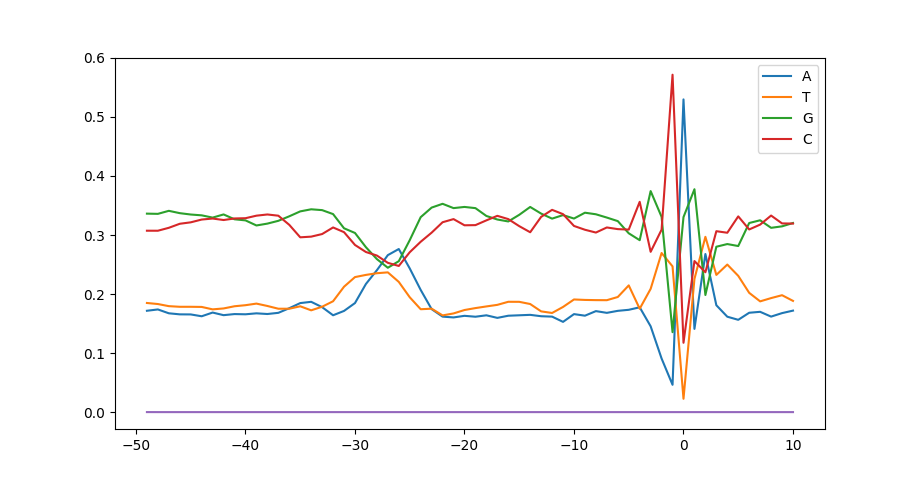

In [47]:
plt.plot(base_range, freq)
plt.legend(['A', 'T', 'G', 'C'])

<IPython.core.display.Javascript object>


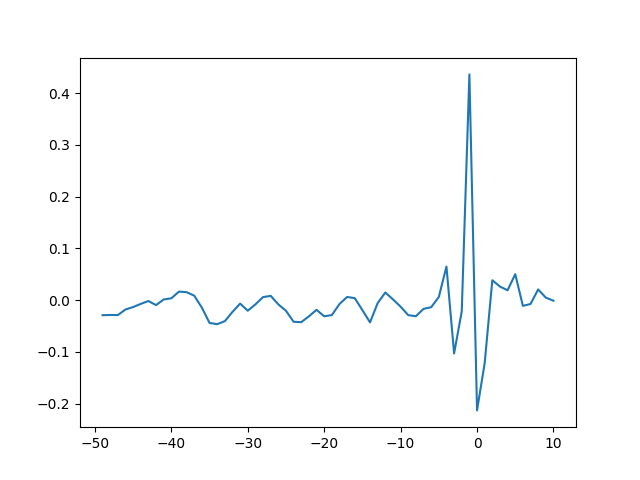

In [48]:
cgskew = freq[:,nuc_map['C']] - freq[:,nuc_map['G']]
plt.plot(base_range, cgskew)

In [57]:
def motif_freq(motif):
    motif = motif.upper()
    n = len(motif)
    freq = np.zeros(60-n+1)
    for _, row in tqdm_notebook(epd_sequence_data.iterrows()):
        seq = row['Sequence']
        for index in range(60-n+1):
            subseq = seq[index: index+n].upper()
            if subseq == motif:
                freq[index] += 1
    return freq/len(epd_sequence_data)
    
tata_freq = motif_freq('TATA')

<IPython.core.display.Javascript object>


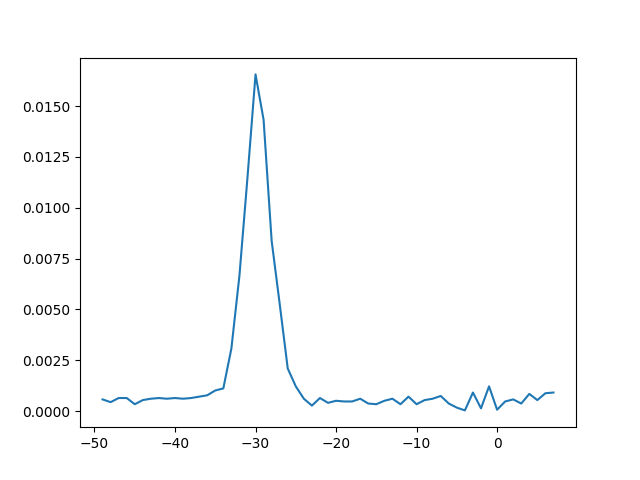

In [64]:
plt.plot(base_range[:-3], tata_freq)

<IPython.core.display.Javascript object>


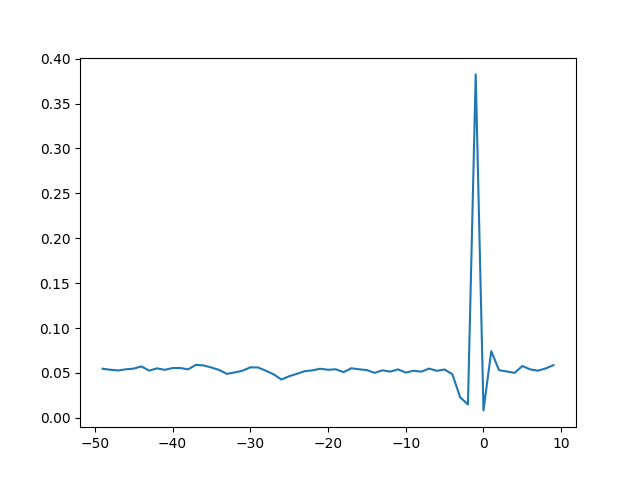

In [63]:
plt.plot(base_range[:-1], motif_freq('CA'))